In [35]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from os import listdir
from os.path import isfile,join
from time import sleep

In [36]:

import gc
def loadBST(fn0):
    D2=[]
    with h5py.File(fn0[:], 'r') as f:
      for s in f.keys():
#         print(s,f[s].keys())
#        try:
         D=np.array(f[s]['values'])
#         print(s,D.shape)
         D2.append(D[:,:])
#        except:
#            continue;
    D2=np.array(D2)
    return D2


In [37]:
dhours=[]
dcnt=[]
#opath='xst_mean'
fpath='bst'
if True:
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files),files[0])

23 BST_2022-08-08-08-10-20.h5


In [50]:
if False:
    D=loadBST('bst/'+files[0])
    n1,n2,n3=D.shape
    D=D.reshape([n1,n2,488,2])
else:
    D=[]
    for f in files[:]:
        try:
            D2=loadBST('bst/'+f)
            if D2.shape[0]==3600:
                print(f,D2.shape)
                D.append(D2)
            else:
                print(f,D2.shape,": Wrong length")
        except:
            print(f,"Failed")
    D=np.array(D)
    n0,n1,n2,n3=D.shape
    D=D.reshape([n0*n1,n2,488,2])
D=D[:,0,:,:]
D=D.swapaxes(1,2)
print(D.shape)


BST_2022-08-08-08-10-20.h5 (3600, 2, 976)
BST_2022-08-08-09-10-20.h5 (3600, 2, 976)
BST_2022-08-08-10-10-20.h5 (3600, 2, 976)
BST_2022-08-08-11-10-20.h5 (3600, 2, 976)
BST_2022-08-08-12-10-20.h5 (3600, 2, 976)
BST_2022-08-08-13-10-20.h5 (3600, 2, 976)
BST_2022-08-08-14-10-20.h5 (3600, 2, 976)
BST_2022-08-08-15-10-20.h5 (3600, 2, 976)
BST_2022-08-08-16-10-20.h5 (3600, 2, 976)
BST_2022-08-08-17-10-20.h5 (3600, 2, 976)
BST_2022-08-08-18-10-20.h5 (3600, 2, 976)
BST_2022-08-08-19-10-20.h5 (3600, 2, 976)
BST_2022-08-08-20-10-20.h5 (3600, 2, 976)
BST_2022-08-08-21-10-20.h5 (3600, 2, 976)
BST_2022-08-08-22-10-20.h5 (3600, 2, 976)
BST_2022-08-08-23-10-20.h5 (3600, 2, 976)
BST_2022-08-09-00-10-20.h5 (3600, 2, 976)
BST_2022-08-09-01-10-20.h5 (3600, 2, 976)
BST_2022-08-09-02-10-20.h5 (3600, 2, 976)
BST_2022-08-09-03-10-20.h5 (3600, 2, 976)
BST_2022-08-09-04-10-20.h5 (3600, 2, 976)
BST_2022-08-09-05-10-20.h5 (3600, 2, 976)
BST_2022-08-09-06-10-20.h5 Failed
(79200, 2, 488)


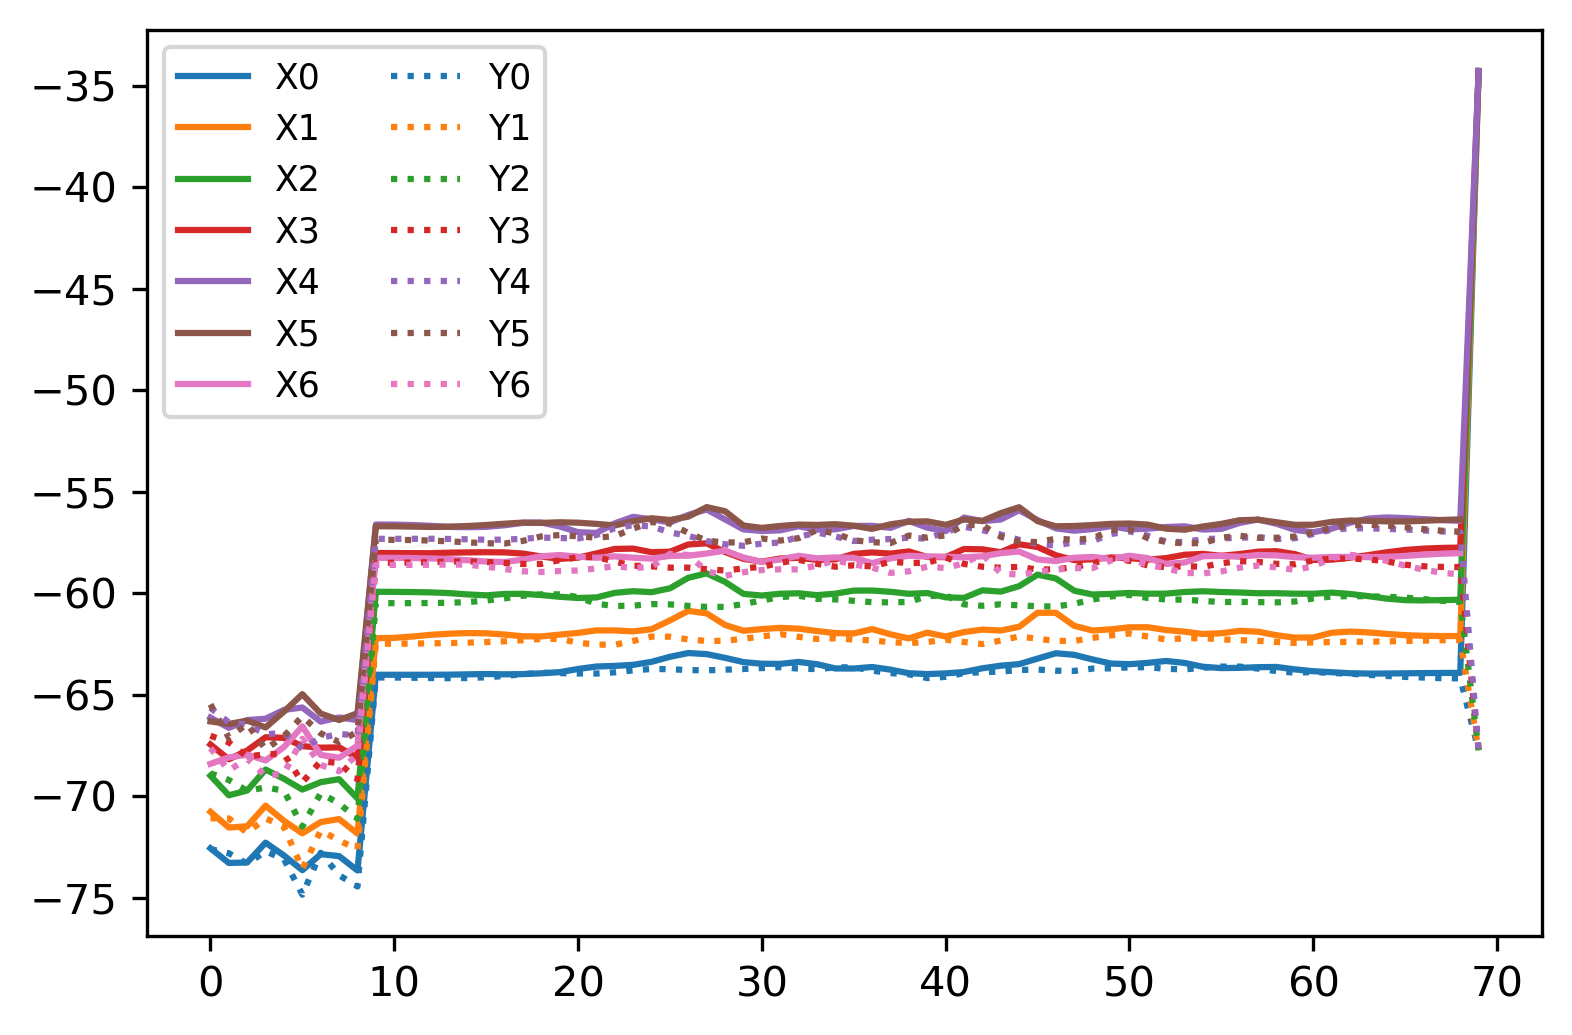

In [51]:
plt.figure(dpi=300)
Dm=np.percentile(D,50,axis=0)
freq=np.arange(512)/512*100
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
for i,si in enumerate(['X','Y']):
    for f in range(7):
       plt.plot(10*np.log10(Dm[i,f::7])-GainADC,'-' if i==0 else ':',label=si+str(f))
    plt.gca().set_prop_cycle(None)
plt.legend(fontsize='small',ncol=2)

Text(0.5, 1.0, 'DTS BST: Power (dB) in LBA X-beam, f=50.8 MHz')

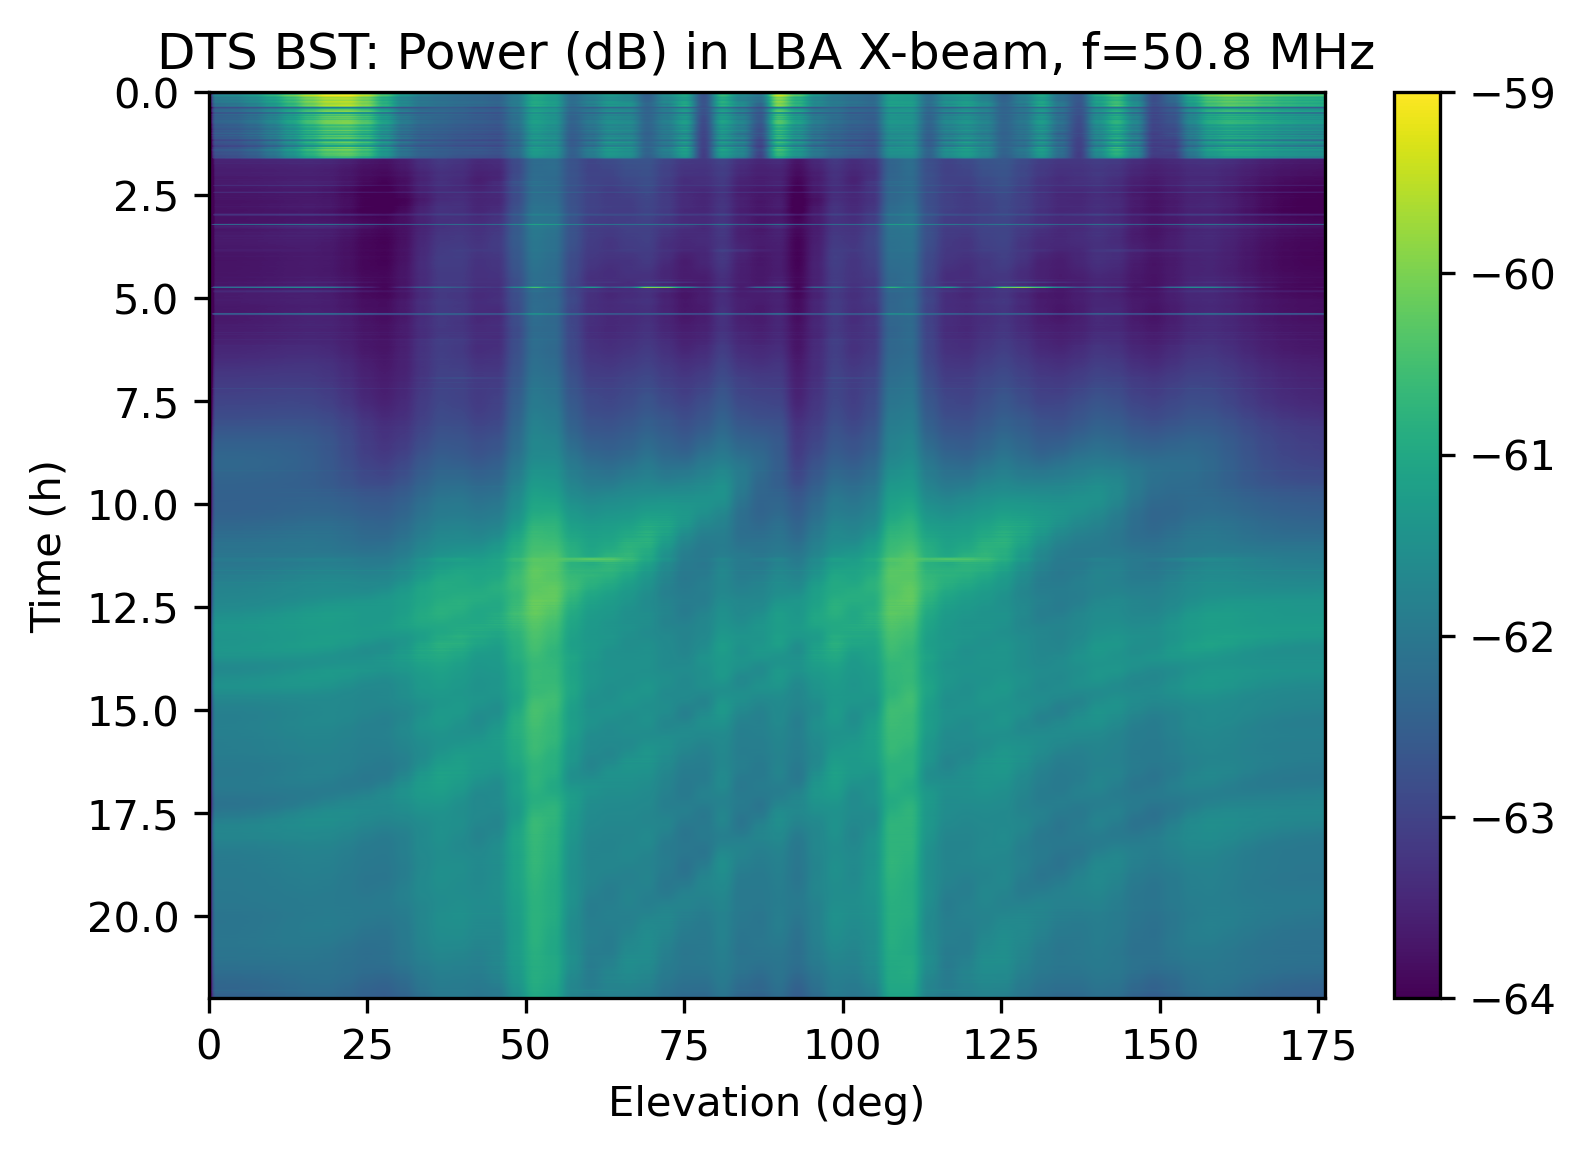

In [87]:
plt.figure(dpi=300)
plt.imshow(10*np.log10(D[:,0,1::7])-GainADC,aspect='auto',vmin=-64,vmax=-59,extent=(0-27,69*3-27,D.shape[0]/60/60,0))
plt.ylabel("Time (h)")
plt.xlabel("Elevation (deg)")
plt.xlim(0,180-3-1)
plt.colorbar()
plt.title("DTS BST: Power (dB) in LBA X-beam, f=50.8 MHz")

Text(0.5, 1.0, 'DTS BST: Power (dB) in LBA Y-beam, f=50.8 MHz')

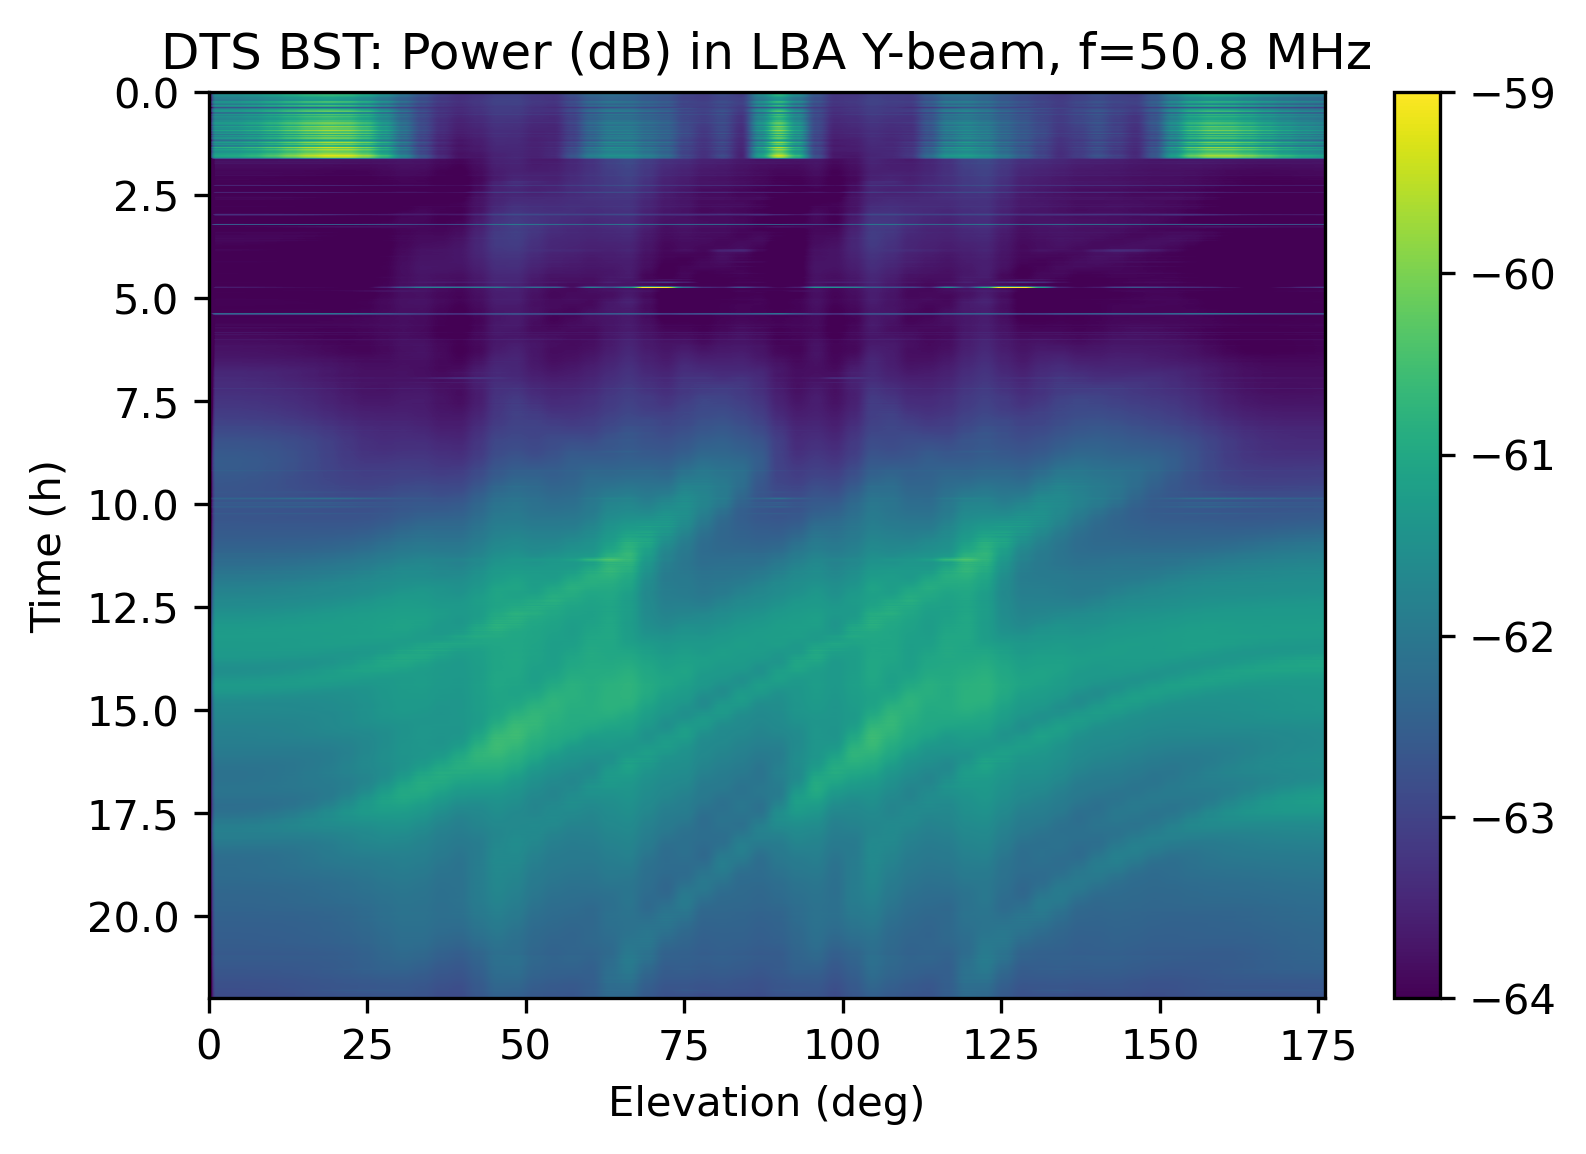

In [88]:
plt.figure(dpi=300)
plt.imshow(10*np.log10(D[:,1,1::7])-GainADC,aspect='auto',vmin=-64,vmax=-59,extent=(0-27,69*3-27,D.shape[0]/60/60,0))
plt.ylabel("Time (h)")
plt.xlabel("Elevation (deg)")
plt.xlim(0,180-3-1)
plt.colorbar()
plt.title("DTS BST: Power (dB) in LBA Y-beam, f=50.8 MHz")

Text(0.5, 1.0, 'DTS BST: Power (dB) in LBA X-beam, f=60.5 MHz')

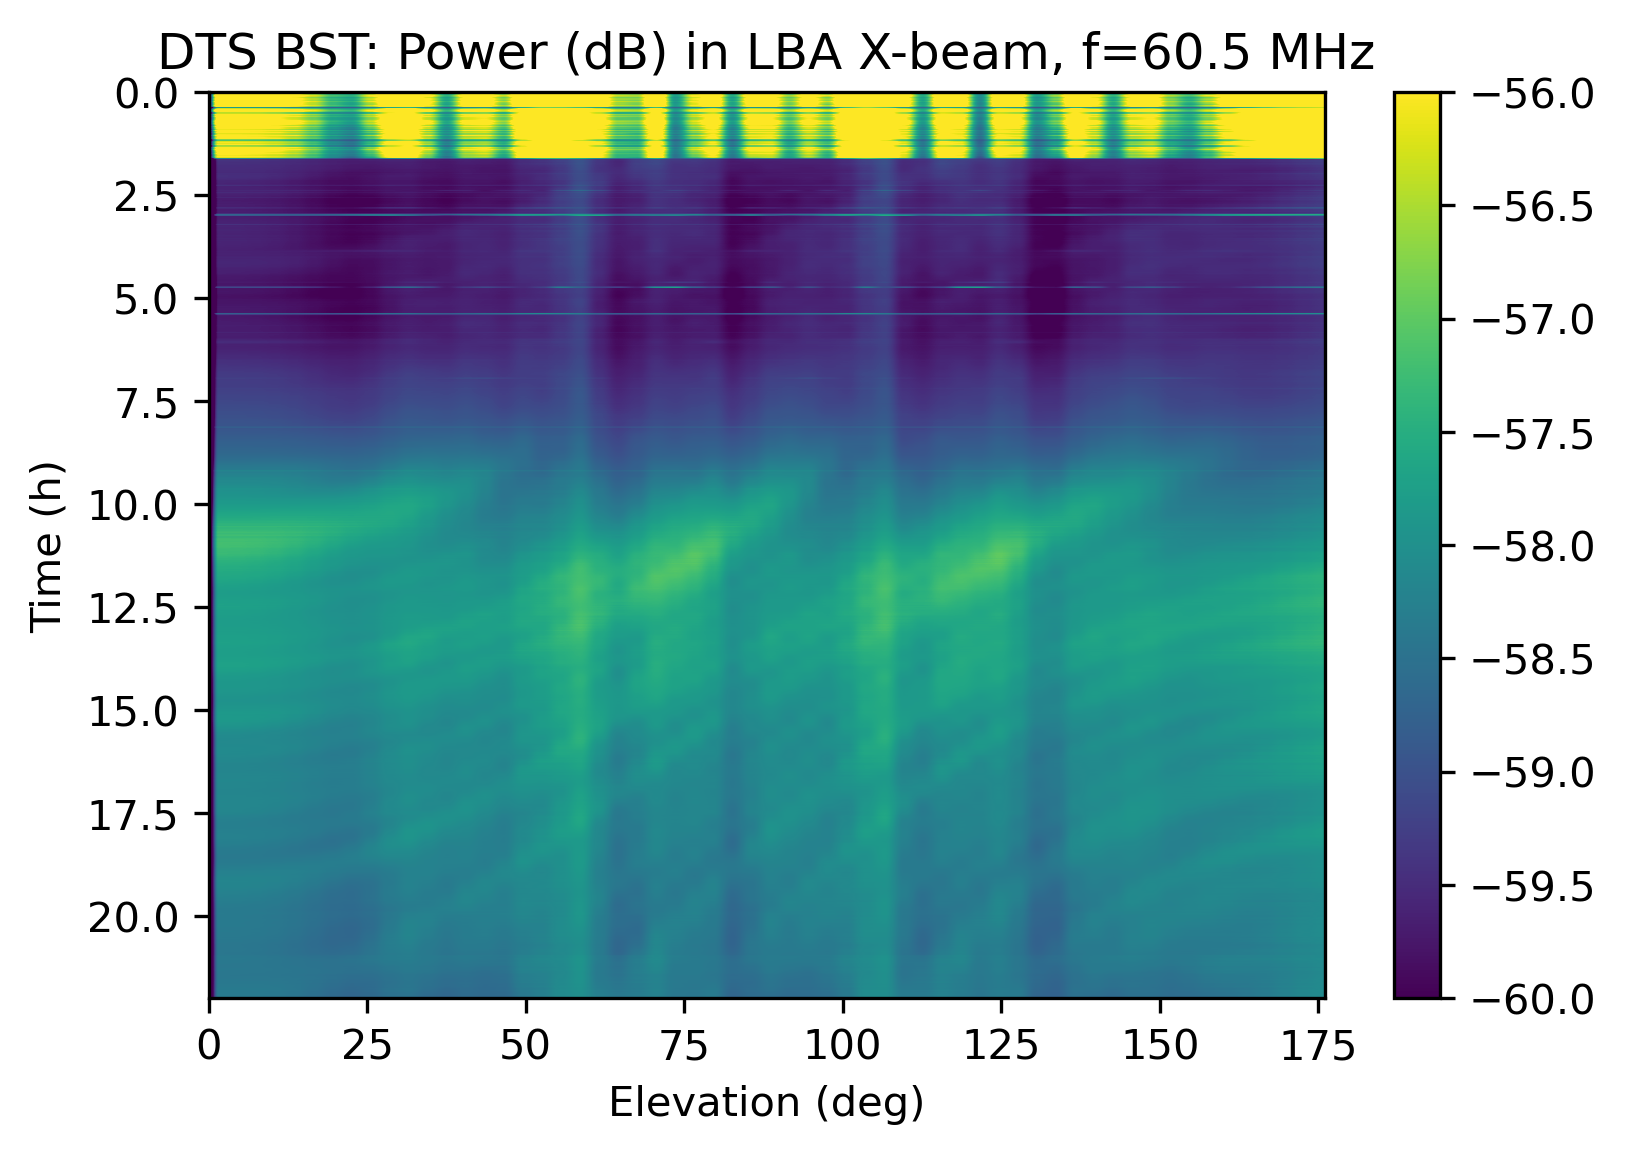

In [91]:
plt.figure(dpi=300)
plt.imshow(10*np.log10(D[:,0,6::7])-GainADC,aspect='auto',vmin=-60,vmax=-56,extent=(0-27,69*3-27,D.shape[0]/60/60,0))
plt.ylabel("Time (h)")
plt.xlabel("Elevation (deg)")
plt.xlim(0,180-3-1)
plt.colorbar()
plt.title("DTS BST: Power (dB) in LBA X-beam, f=60.5 MHz")

Text(0.5, 1.0, 'DTS BST: Power (dB) in LBA Y-beam, f=60.5 MHz')

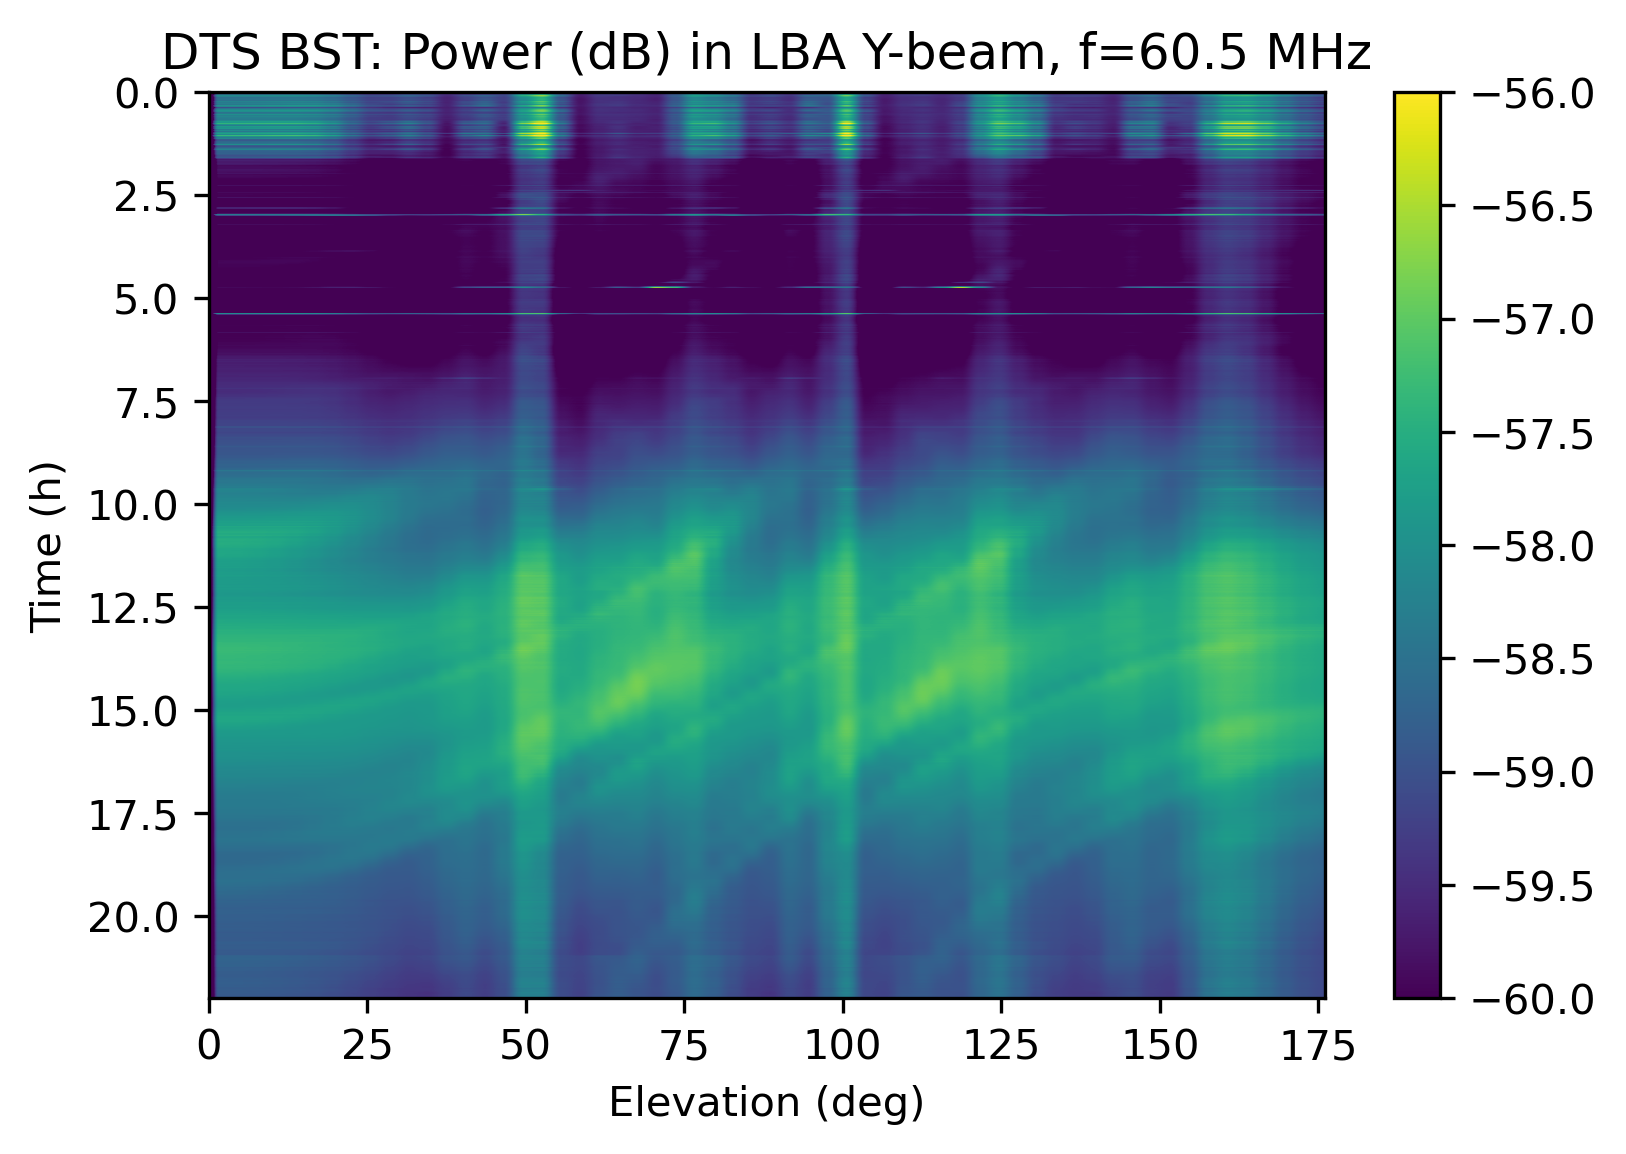

In [92]:
plt.figure(dpi=300)
plt.imshow(10*np.log10(D[:,1,6::7])-GainADC,aspect='auto',vmin=-60,vmax=-56,extent=(0-27,69*3-27,D.shape[0]/60/60,0))
plt.ylabel("Time (h)")
plt.xlabel("Elevation (deg)")
plt.xlim(0,180-3-1)
plt.colorbar()
plt.title("DTS BST: Power (dB) in LBA Y-beam, f=60.5 MHz")